 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [53]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [54]:
# Reading whale returns
whale_returns = pd.read_csv("Resources/whale_returns.csv",parse_dates=True,infer_datetime_format=True, index_col="Date" )
whale_returns.rename(columns={
    "SOROS FUND MANAGEMENT LLC":"Soros",
    "PAULSON & CO.INC. ":"Paulson",
    "TIGER GLOBAL MANAGEMENT LLC":"Tiger",
    "BERKSHIRE HATHAWAY INC":"BH",
}, inplace=True)

In [55]:
whale_returns.head()

,Soros,Paulson,Tiger,BH
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [56]:
# Count nulls
whale_returns.isnull().sum()

Soros      1
Paulson    1
Tiger      1
BH         1
dtype: int64

In [57]:
# Drop nulls
whale_returns.dropna(axis=0,inplace=True)

In [58]:
whale_returns.isnull().sum()

Soros      0
Paulson    0
Tiger      0
BH         0
dtype: int64

In [59]:
# Sorting DF to ascending order
whale_returns.sort_index(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [60]:
# Reading algorithmic returns
algo_returns = pd.read_csv("Resources/algo_returns.csv",parse_dates=True,infer_datetime_format=True, index_col="Date")

In [61]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [62]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [63]:
# Drop nulls
algo_returns.dropna(axis=0,inplace=True)

In [64]:
# Sorting DF to ascending order
algo_returns.sort_index(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [65]:
# Reading S&P 500 Closing Prices
market_history = pd.read_csv("Resources/sp500_history.csv",parse_dates=True,infer_datetime_format=True, index_col="Date")

In [66]:
# Check Data Types
market_history["Close"].dtypes

dtype('O')

In [67]:
# Fix Data Types

market_history["Close"] = market_history["Close"].str.replace("$","")
market_history["Close"] = market_history["Close"].astype(float,errors="raise")

C:\Users\dariu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
# Sorting DF to ascending order
market_history.sort_index(inplace=True)

In [69]:
# Calculate Daily Returns
market_returns = market_history.pct_change()

In [70]:
# Drop nulls
market_returns.dropna(axis=0, inplace=True)

In [71]:
# Rename `Close` Column to be specific to this portfolio.
market_returns.columns = ["Market"]

In [72]:
market_returns.head()

,Market
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [73]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algo_market_returns = pd.concat([whale_returns,algo_returns,market_returns],axis = 1, join="inner")

In [74]:
whale_algo_market_returns.head()

,Soros,Paulson,Tiger,BH,Algo 1,Algo 2,Market
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

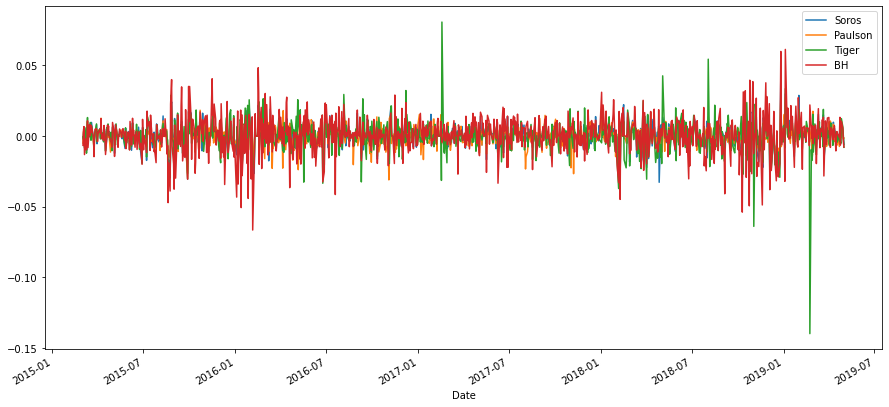

In [75]:
# Plot daily returns of all portfolios
whale_returns.plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

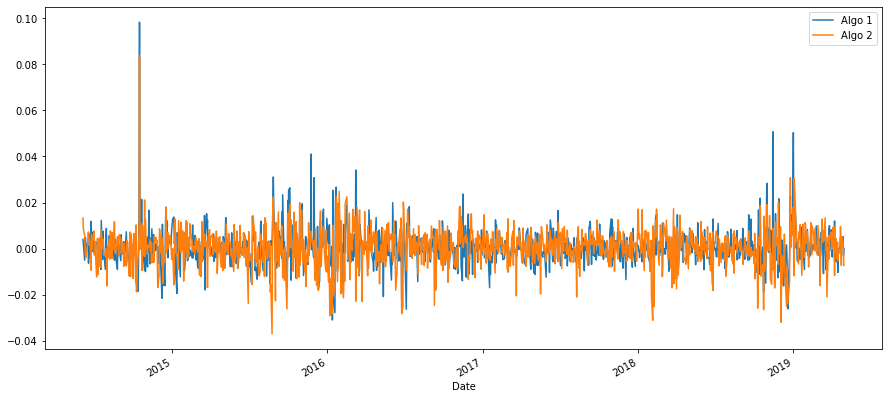

In [76]:
algo_returns.plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

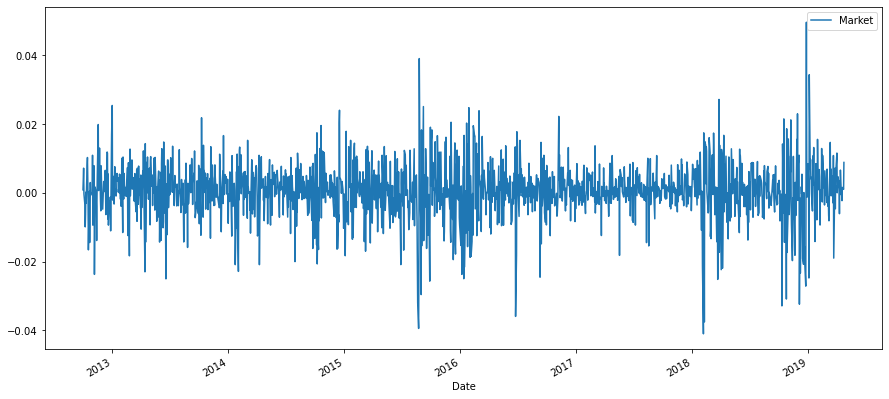

In [77]:
market_returns.plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

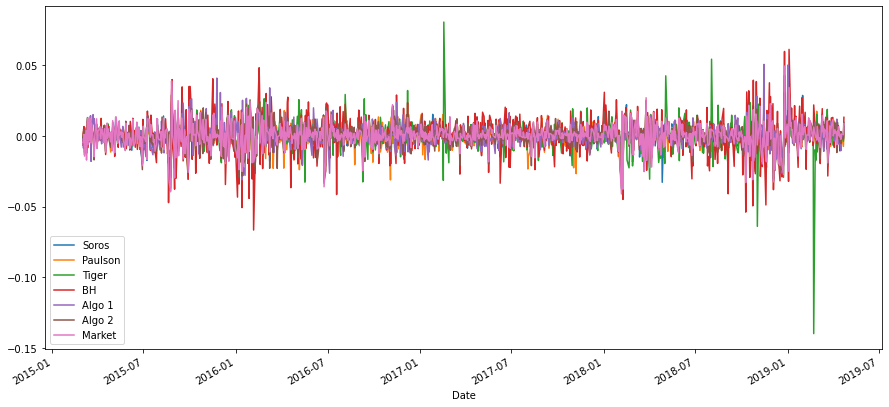

In [78]:
whale_algo_market_returns.plot(figsize=(15,7))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

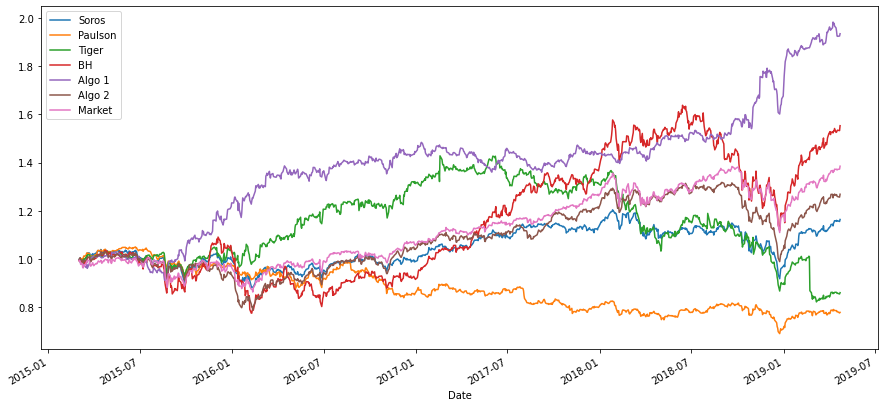

In [79]:
# Calculate cumulative returns of all portfolios
whale_algo_market_cumulative = (1 + whale_algo_market_returns).cumprod()
# Plot cumulative returns
whale_algo_market_cumulative.plot(figsize=(15,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


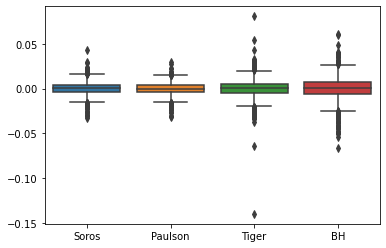

In [80]:
# Box plot to visually show risk

import seaborn as sns

whale_bp=sns.boxplot(data=whale_returns)


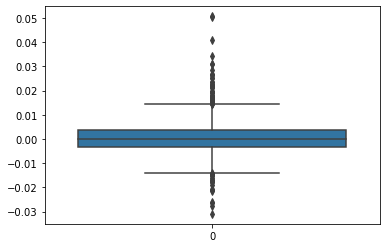

In [81]:
# algo_boxplot=sns.boxplot(data=algo_returns)
algo_1_bp=sns.boxplot(data=whale_algo_market_returns["Algo 1"])

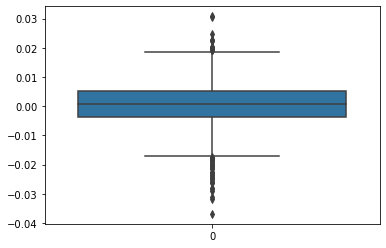

In [82]:
algo_2_bp=sns.boxplot(data=whale_algo_market_returns["Algo 2"])

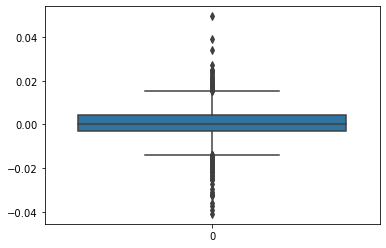

In [83]:
market_bp=sns.boxplot(data=whale_algo_market_returns["Market"])

### Calculate Standard Deviations

In [84]:
# Calculate the daily standard deviations of all portfolios
whale_algo_market_returns.std()

Soros      0.007895
Paulson    0.007023
Tiger      0.010894
BH         0.012919
Algo 1     0.007620
Algo 2     0.008342
Market     0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [85]:
whale_algo_market_returns

,Soros,Paulson,Tiger,BH,Algo 1,Algo 2,Market
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [86]:
# Calculate the daily standard deviation of S&P 500
market_returns.std()

# Determine which portfolios are riskier than the S&P 500
soros_market_cov=whale_algo_market_returns["Soros"].cov(whale_algo_market_returns["Market"])
paulson_market_cov=whale_algo_market_returns["Paulson"].cov(whale_algo_market_returns["Market"])
tiger_market_cov=whale_algo_market_returns["Tiger"].cov(whale_algo_market_returns["Market"])
bh_market_cov=whale_algo_market_returns["BH"].cov(whale_algo_market_returns["Market"])
algo1_market_cov=whale_algo_market_returns["Algo 1"].cov(whale_algo_market_returns["Market"])
algo2_market_cov=whale_algo_market_returns["Algo 2"].cov(whale_algo_market_returns["Market"])
market_var=whale_algo_market_returns["Market"].var()

In [87]:
beta_soros=soros_market_cov/market_var
beta_paulson=paulson_market_cov/market_var
beta_tiger=tiger_market_cov/market_var
beta_bh=bh_market_cov/market_var
beta_algo1=algo1_market_cov/market_var
beta_algo2=algo2_market_cov/market_var

In [88]:
beta_soros

0.773375354779462

In [89]:
beta_paulson

0.5498861853574506

In [90]:
beta_tiger

0.7946528805681025

In [91]:
beta_bh

1.1347891297491692

In [92]:
beta_algo1

0.24899091459425635

In [93]:
beta_algo2

0.8375345402757753

In [94]:
'''
The Birkshire Hathaway portfolio is riskier than the Market

'''

'\nThe Birkshire Hathaway portfolio is riskier than the Market\n\n'

### Calculate the Annualized Standard Deviation

In [95]:
# Calculate the annualized standard deviation (252 trading days)
market_annualized_std = market_returns.std()*np.sqrt(252)
market_annualized_std

Market    0.128762
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

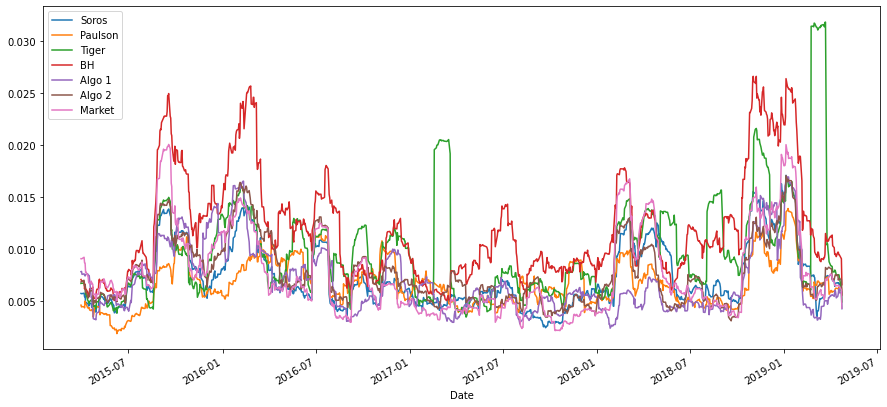

In [96]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_algo_market_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
whale_algo_market_returns.rolling(window = 21).std().plot(figsize=(15,7))

### Calculate and plot the correlation

In [97]:
# Calculate the correlation
whale_algo_market_returns.corr()
# Display de correlation matrix
display(whale_algo_market_returns.corr())

,Soros,Paulson,Tiger,BH,Algo 1,Algo 2,Market
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BH,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Market,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:>

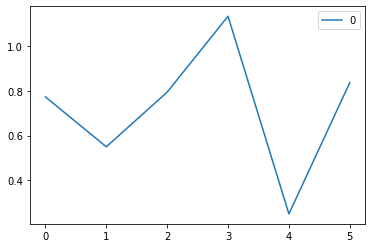

In [106]:
# Calculate covariance of a single portfolio
soros_market_cov
# Calculate variance of S&P 500
market_var
# Computing beta
beta_soros
# Plot beta trend
beta_trend = [beta_soros,beta_paulson,beta_tiger,beta_bh,beta_algo1,beta_algo2]
beta_trend = pd.DataFrame(beta_trend)
beta_trend.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [121]:
# Use `ewm` to calculate the rolling window
whale_algo_market_returns.ewm(halflife=21).std()

,Soros,Paulson,Tiger,BH,Algo 1,Algo 2,Market
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [122]:
# Annualized Sharpe Ratios
sharpe_ratio = whale_algo_market_returns.mean()/whale_algo_market_returns.std()

<AxesSubplot:>

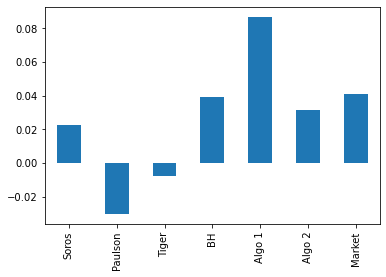

In [123]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

According to the data, the 1st Algorithmic strategy outperforms both the market and whale portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [125]:
# Reading data from 1st stock
aapl = pd.read_csv("Resources/aapl_historical.csv",parse_dates=True,infer_datetime_format=True, index_col="Trade DATE" )

In [126]:
# Reading data from 2nd stock
goog = pd.read_csv("Resources/goog_historical.csv",parse_dates=True,infer_datetime_format=True, index_col="Trade DATE" )

In [127]:
# Reading data from 3rd stock
cost = pd.read_csv("Resources/cost_historical.csv",parse_dates=True,infer_datetime_format=True, index_col="Trade DATE" )

In [133]:
# Combine all stocks in a single DataFrame
custom_pf = pd.concat([aapl,goog,cost], axis=1, join="inner")
custom_pf

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48


In [142]:
# Reset Date index
custom_pf.reset_index()

,index,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,0,2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
1,1,2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2,2,2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
3,3,2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
4,4,2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62
...,...,...,...,...,...,...,...,...
245,245,2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
246,246,2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
247,247,2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
248,248,2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88


In [141]:
# Reorganize portfolio data by having a column per symbol
custom_pf

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
1,2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2,2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
3,2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
4,2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62
...,...,...,...,...,...,...,...
245,2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
246,2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
247,2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
248,2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!